In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
chars = sorted(list(set(''.join(words))))
stoi ={s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos={i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [4]:
block_size = 3
X,Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix  = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '----->' , itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y  = torch.tensor(Y)

In [5]:
X.shape, X.dtype, Y.shape,Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [6]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context  = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [7]:
#X

In [8]:
#Y

In [9]:
C = torch.randn((27,2))

In [24]:
C

tensor([[-0.6247, -1.4337],
        [ 1.2554,  0.4270],
        [ 1.9275,  1.0294],
        [ 0.5128,  0.2821],
        [ 1.8068, -1.5228],
        [ 0.8890, -0.1867],
        [ 0.5973, -1.8393],
        [-1.2193,  0.6714],
        [ 0.9227, -0.9124],
        [-0.6973, -0.5756],
        [-0.4196,  0.2736],
        [ 0.2798,  1.3262],
        [ 0.8209,  0.8469],
        [ 1.0980, -0.7150],
        [-0.1347, -0.6124],
        [ 0.2730, -0.0810],
        [-1.4019,  0.9087],
        [ 1.4741,  2.8612],
        [ 0.0187, -0.0227],
        [-1.3198, -0.4906],
        [-0.5577, -1.5091],
        [-0.6406, -0.0955],
        [ 0.6430, -0.5927],
        [ 0.4914,  0.2948],
        [ 0.0581,  0.6684],
        [ 0.6426, -0.5713],
        [ 0.0164, -0.4900]])

In [11]:
C[5]

tensor([ 0.8890, -0.1867])

In [12]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([ 0.8890, -0.1867])

In [13]:
#C[X]

In [14]:
X[13,2]

tensor(1)

In [30]:
a=C[X].shape
a

torch.Size([228146, 3, 2])

In [16]:
C[1]

tensor([1.2554, 0.4270])

In [17]:
emb=C[X]

In [18]:
W1 = torch.randn((6, 100))
W1

tensor([[ 3.2333e-01,  1.6349e-01,  1.0882e+00,  1.5283e+00,  1.1883e+00,
          9.2652e-01, -3.1737e-02,  3.1105e-01, -4.8762e-02,  7.9918e-01,
         -1.4549e+00,  7.1977e-02, -2.1048e+00,  3.5405e-01, -3.5821e-01,
          4.5237e-01,  4.7035e-01, -6.8253e-01, -1.8418e+00,  1.4649e+00,
          7.0031e-01, -9.7501e-01, -8.6387e-01, -4.8401e-01, -5.5220e-01,
          7.2243e-01,  2.6670e+00, -2.4989e-01, -1.0970e+00,  7.6159e-01,
         -1.0632e+00,  1.9120e+00, -4.5037e-02, -9.1524e-01,  5.4986e-02,
         -8.5425e-01, -7.9871e-01, -1.0340e+00, -3.3250e-02, -3.4396e-02,
         -6.3824e-01, -7.0875e-01, -1.6414e-02,  5.2081e-02, -1.5902e+00,
         -7.4446e-01,  2.1019e+00,  9.6181e-02, -6.7584e-01,  3.9109e-01,
         -5.5917e-01,  5.5260e-01,  4.8988e-01,  1.3720e+00,  8.9829e-01,
          1.0039e+00,  8.9688e-01,  9.2171e-01, -5.9730e-01, -1.7275e+00,
          5.8421e-01,  5.1192e-01, -1.3078e+00, -7.3651e-02,  3.4459e-01,
         -1.5079e+00, -5.6566e-01, -7.

In [79]:
B1 = torch.randn((100))

In [80]:
#emb @ W + B

In [81]:
#emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]

In [82]:
#torch.cat((emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]), 1)

In [83]:
torch.unbind(emb, 1)

(tensor([[-0.1522, -0.5865],
         [-0.1522, -0.5865],
         [-0.1522, -0.5865],
         ...,
         [-0.1976, -0.1979],
         [-0.1976, -0.1979],
         [ 1.3143,  0.2419]]),
 tensor([[-0.1522, -0.5865],
         [-0.1522, -0.5865],
         [ 0.5998, -0.8777],
         ...,
         [-0.1976, -0.1979],
         [ 1.3143,  0.2419],
         [-0.1976, -0.1979]]),
 tensor([[-0.1522, -0.5865],
         [ 0.5998, -0.8777],
         [ 0.3875, -0.7951],
         ...,
         [ 1.3143,  0.2419],
         [-0.1976, -0.1979],
         [ 1.9052,  0.9893]]))

In [84]:
torch.cat((torch.unbind(emb, 1)), 1)

tensor([[-0.1522, -0.5865, -0.1522, -0.5865, -0.1522, -0.5865],
        [-0.1522, -0.5865, -0.1522, -0.5865,  0.5998, -0.8777],
        [-0.1522, -0.5865,  0.5998, -0.8777,  0.3875, -0.7951],
        ...,
        [-0.1976, -0.1979, -0.1976, -0.1979,  1.3143,  0.2419],
        [-0.1976, -0.1979,  1.3143,  0.2419, -0.1976, -0.1979],
        [ 1.3143,  0.2419, -0.1976, -0.1979,  1.9052,  0.9893]])

In [85]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [86]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [87]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [88]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [89]:
emb

tensor([[[-0.1522, -0.5865],
         [-0.1522, -0.5865],
         [-0.1522, -0.5865]],

        [[-0.1522, -0.5865],
         [-0.1522, -0.5865],
         [ 0.5998, -0.8777]],

        [[-0.1522, -0.5865],
         [ 0.5998, -0.8777],
         [ 0.3875, -0.7951]],

        ...,

        [[-0.1976, -0.1979],
         [-0.1976, -0.1979],
         [ 1.3143,  0.2419]],

        [[-0.1976, -0.1979],
         [ 1.3143,  0.2419],
         [-0.1976, -0.1979]],

        [[ 1.3143,  0.2419],
         [-0.1976, -0.1979],
         [ 1.9052,  0.9893]]])

In [90]:
emb.view(-1,6)

tensor([[-0.1522, -0.5865, -0.1522, -0.5865, -0.1522, -0.5865],
        [-0.1522, -0.5865, -0.1522, -0.5865,  0.5998, -0.8777],
        [-0.1522, -0.5865,  0.5998, -0.8777,  0.3875, -0.7951],
        ...,
        [-0.1976, -0.1979, -0.1976, -0.1979,  1.3143,  0.2419],
        [-0.1976, -0.1979,  1.3143,  0.2419, -0.1976, -0.1979],
        [ 1.3143,  0.2419, -0.1976, -0.1979,  1.9052,  0.9893]])

In [91]:
emb.view(-1,6) == torch.cat((torch.unbind(emb, 1)), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        ...,
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

In [92]:
h = emb.view(emb.shape[0],6) @ W1 + B1

In [93]:
h.shape

torch.Size([228146, 100])

In [94]:
h = torch.tanh(emb.view(-1,6) @ W1 + B1)

In [95]:
h.shape

torch.Size([228146, 100])

In [96]:
W2= torch.randn(100, 27)
B2= torch.randn(27)

In [97]:
logits = h @  W2 + B2
counts = logits.exp()
probs = counts/counts.sum(1, keepdims=True)

In [98]:
probs.shape

torch.Size([228146, 27])

In [99]:
Y.shape

torch.Size([228146])

In [100]:
-probs[torch.arange(228146), Y].log().mean()

tensor(12.6670)

In [101]:
loss = F.cross_entropy(logits, Y)

In [102]:
loss

tensor(12.6670)

In [146]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30, 200), generator=g)
B1 = torch.randn((200), generator=g)
W2 = torch.randn((200, 27), generator=g)
B2 = torch.randn((27), generator=g)
parameters = [C, W1, B1, W2, B2]

In [147]:
sum(p.nelement() for p in parameters)

11897

In [148]:
for p in parameters:
    p.requires_grad = True

In [149]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [157]:
lri =[]
lossi = []
stepi = []

for i in range(50000):
    #minibatch
    ix = torch.randint(0,Xtr.shape[0], (32,))

    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @  W1 + B1)
    logits = h @ W2 + B2
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad  = None
    loss.backward()

    #update
    #lr  = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data -= lr*p.grad
    stepi.append(i)
    #lri.append(lre[i])
    lossi.append(loss.item())
print(loss.item())

2.179572343826294


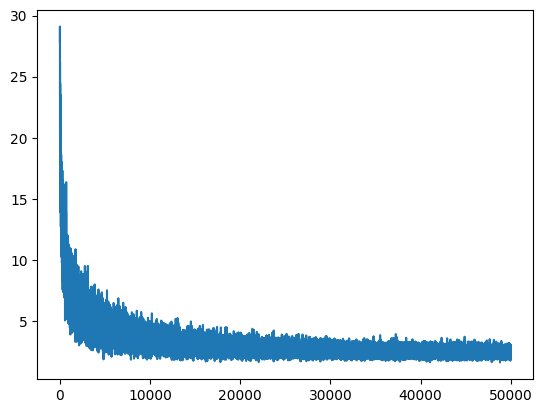

In [151]:
plt.plot(stepi, lossi)

In [152]:
emb = C[X]
h = torch.tanh(emb.view(-1, 30) @  W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.417783737182617


In [ ]:
logits.max(1)

In [ ]:
torch.randint(0, X.shape[0], (32,))

In [158]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @  W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.275864362716675


In [160]:
emb = C[Xval]
h = torch.tanh(emb.view(-1, 30) @  W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Yval)
print(loss.item())

2.289673328399658


In [161]:
emb = C[Xte]
h = torch.tanh(emb.view(-1, 30) @  W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.2907207012176514


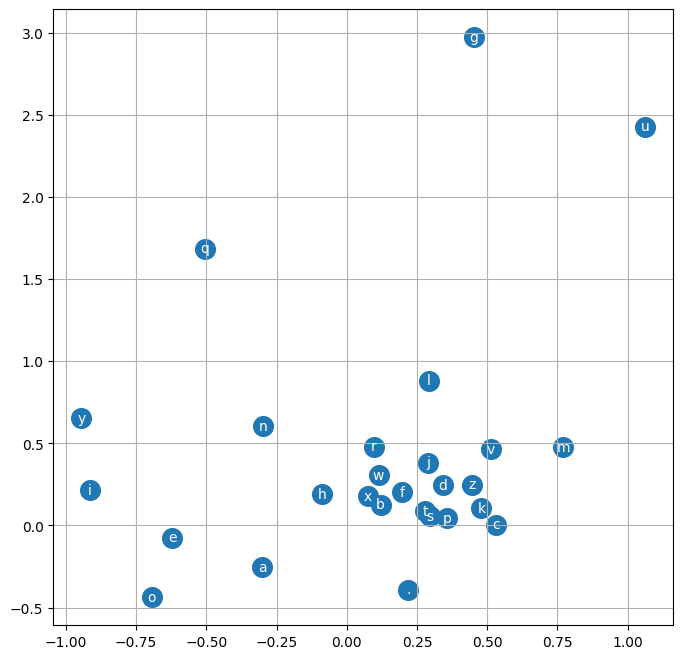

In [145]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data,  C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha = "center", va = "center", color = "white")
plt.grid('minor')

In [171]:
for _ in range(20):
    out =[]
    context  = [0]*block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + B1)
        logits = h @ W2 + B2
        prob = F.softmax(logits, dim=1)
        ix = torch.multinomial(prob, num_samples=1).item()
        context = context[1:] + [ix]
        if ix==0:
            break
        out.append(itos[ix])

    print(''.join(i for i in out))

elli
ayamarslynne
bestenie
adiah
alasei
bannaudly
loanlevio
sallisy
twaysa
day
twacja
lowien
venarasnain
uriellyrniata
telynniah
aliyla
hargielan
rohmahe
rixanco
see
